In [8]:
from glob import glob #read all files from the folder
import os
import mne #Analyze to eeg dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#read all file
all_files_path=glob('D:/dataverse_files/*.edf')
print(len(all_files_path))

28


In [10]:
all_files_path[0]

'D:/dataverse_files\\h01.edf'

In [11]:
healthy_file_path=[i for i in all_files_path if  'h' in i.split('\\')[1]]# healthy persons data
patient_file_path=[i for i in all_files_path if  's' in i.split('\\')[1]]#patient data

In [12]:
def read_data(file_path):
    datax=mne.io.read_raw_edf(file_path,preload=True)
    datax.set_eeg_reference() #Do average of all channel If you want to recompute your data with a different reference than was used when the raw data were recorded and/or saved, MNE-Python provides the set_eeg_reference() 
    datax.filter(l_freq=1,h_freq=45)#Filtering raw data in 1 contiguous segment Setting up high-pass filter at 1 Hz
    epochs=mne.make_fixed_length_epochs(datax,duration=25,overlap=0) # converts the contious data into segment called epochs#To create fixed length epochs, we simply call the function and provide it with the appropriate parameters indicating the desired duration of epochs in seconds, whether or not to preload data, whether or not to reject epochs that overlap with raw data segments annotated as bad, whether or not to include projectors, and finally whether or not to be verbose. Here, we choose a long epoch duration (30 seconds). To conserve memory, we set preload to False.
    epochs=epochs.get_data()# convert the data into numpy array
    return epochs #trials,channel,length

In [13]:
data=read_data(healthy_file_path[0])

Extracting EDF parameters from D:\dataverse_files\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Not setting metadata
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activate

In [14]:
data.shape #1. no of epochs 2.channel, 3.length of the signals

(37, 19, 6250)

In [15]:
control_epochs_array=[read_data(subject) for subject in healthy_file_path]
patients_epochs_array=[read_data(subject) for subject in patient_file_path]

Extracting EDF parameters from D:\dataverse_files\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Not setting metadata
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activate

- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Not setting metadata
Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Loading data for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from D:\dataverse_files\h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Not setting metadata
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Loading data for 45 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from D:\dataverse_files\s03.edf...
EDF file detected
Setting channel info structure...
Crea

- Filter length: 825 samples (3.300 sec)

Not setting metadata
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Loading data for 47 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from D:\dataverse_files\s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge:

In [16]:
control_epochs_array

[array([[[-1.27054942e-21,  5.32628216e-08,  2.21574116e-07, ...,
          -7.35114121e-06, -4.77442262e-06, -3.01685591e-06],
         [-5.08219768e-21, -6.07544895e-09,  1.67652523e-07, ...,
          -9.68520458e-06, -7.33394840e-06, -5.45382683e-06],
         [-9.52912066e-22, -6.23598157e-08,  5.59825649e-08, ...,
          -5.87921135e-06, -2.19720218e-06,  6.43534780e-07],
         ...,
         [ 5.08219768e-21,  2.41145507e-08, -5.08004461e-09, ...,
          -1.28117633e-06,  1.20782022e-06,  3.34763467e-06],
         [ 1.69406589e-21,  3.91909296e-08,  2.25772421e-08, ...,
           4.66856624e-06,  5.91664940e-06,  6.99319585e-06],
         [-4.23516474e-22, -1.63394100e-08, -1.07411210e-07, ...,
           1.39274578e-05,  1.22422159e-05,  1.02069411e-05]],
 
        [[-2.12303405e-06, -1.34884914e-06,  4.30966205e-07, ...,
           1.42332426e-05,  1.22602686e-05,  9.77292994e-06],
         [-3.47149703e-06, -5.96888038e-07,  3.68156348e-06, ...,
           4.34392032

In [17]:
control_epochs_labels=[len(i)*[0] for i in control_epochs_array]
patients_epochs_labels=[len(i)*[1] for i in patients_epochs_array]
print(len(control_epochs_labels),len(patients_epochs_labels))

14 14


In [18]:
control_epochs_labels

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [19]:
data_list=control_epochs_array+patients_epochs_array
label_list=control_epochs_labels+patients_epochs_labels
print(len(data_list),len(label_list))

28 28


In [20]:
print(data_list)

[array([[[-1.27054942e-21,  5.32628216e-08,  2.21574116e-07, ...,
         -7.35114121e-06, -4.77442262e-06, -3.01685591e-06],
        [-5.08219768e-21, -6.07544895e-09,  1.67652523e-07, ...,
         -9.68520458e-06, -7.33394840e-06, -5.45382683e-06],
        [-9.52912066e-22, -6.23598157e-08,  5.59825649e-08, ...,
         -5.87921135e-06, -2.19720218e-06,  6.43534780e-07],
        ...,
        [ 5.08219768e-21,  2.41145507e-08, -5.08004461e-09, ...,
         -1.28117633e-06,  1.20782022e-06,  3.34763467e-06],
        [ 1.69406589e-21,  3.91909296e-08,  2.25772421e-08, ...,
          4.66856624e-06,  5.91664940e-06,  6.99319585e-06],
        [-4.23516474e-22, -1.63394100e-08, -1.07411210e-07, ...,
          1.39274578e-05,  1.22422159e-05,  1.02069411e-05]],

       [[-2.12303405e-06, -1.34884914e-06,  4.30966205e-07, ...,
          1.42332426e-05,  1.22602686e-05,  9.77292994e-06],
        [-3.47149703e-06, -5.96888038e-07,  3.68156348e-06, ...,
          4.34392032e-06,  2.45066871

In [21]:
label_list

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [22]:
groups_list=[[i]*len(j) for i, j in enumerate(data_list)]

In [23]:
groups_list # i is indexing and j is data i * len j i is zero for list of first element of index element

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 [4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4],
 [5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,


In [24]:
#Convert a list of data into array
data_array=np.vstack(data_list) #
label_array=np.hstack(label_list)
group_array=np.hstack(groups_list)
print(data_array.shape,label_array.shape,group_array.shape)

(1142, 19, 6250) (1142,) (1142,)


In [25]:
data_array

array([[[-1.27054942e-21,  5.32628216e-08,  2.21574116e-07, ...,
         -7.35114121e-06, -4.77442262e-06, -3.01685591e-06],
        [-5.08219768e-21, -6.07544895e-09,  1.67652523e-07, ...,
         -9.68520458e-06, -7.33394840e-06, -5.45382683e-06],
        [-9.52912066e-22, -6.23598157e-08,  5.59825649e-08, ...,
         -5.87921135e-06, -2.19720218e-06,  6.43534780e-07],
        ...,
        [ 5.08219768e-21,  2.41145507e-08, -5.08004461e-09, ...,
         -1.28117633e-06,  1.20782022e-06,  3.34763467e-06],
        [ 1.69406589e-21,  3.91909296e-08,  2.25772421e-08, ...,
          4.66856624e-06,  5.91664940e-06,  6.99319585e-06],
        [-4.23516474e-22, -1.63394100e-08, -1.07411210e-07, ...,
          1.39274578e-05,  1.22422159e-05,  1.02069411e-05]],

       [[-2.12303405e-06, -1.34884914e-06,  4.30966205e-07, ...,
          1.42332426e-05,  1.22602686e-05,  9.77292994e-06],
        [-3.47149703e-06, -5.96888038e-07,  3.68156348e-06, ...,
          4.34392032e-06,  2.45066871e

In [26]:
df2 = pd.DataFrame(group_array)

In [27]:
df2

,0
0,0
1,0
2,0
3,0
4,0
...,...
1137,27
1138,27
1139,27
1140,27


In [28]:
df3 = pd.DataFrame(label_array)

In [29]:
df3

,0
0,0
1,0
2,0
3,0
4,0
...,...
1137,1
1138,1
1139,1
1140,1


In [30]:
from scipy import stats
def mean(data):
    return np.mean(data,axis=-1)# calculate arithmetic mean of the values along the specified axis.
    
def std(data):
    return np.std(data,axis=-1)#standard deviation

def ptp(data):
    return np.ptp(data,axis=-1)#numpy.ptp()function plays an important role in statistics by finding out Range of given numbers. Range = max value – min value.

def var(data):
        return np.var(data,axis=-1)#variation

def minim(data):
      return np.min(data,axis=-1)#function is used to get a minimum value along a specified axis

def maxim(data):
      return np.max(data,axis=-1)#function is used to get a maximum value along a specified axis

def argminim(data):
      return np.argmin(data,axis=-1)#The numpy.argmin() method returns indices of the min element of the array in a particular axis.


def argmaxim(data):
      return np.argmax(data,axis=-1)#The numpy.argmax() method returns indices of the max element of the array in a particular axis.

def mean_square(data):
      return np.mean(data**2,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)


def skewness(data):
    return stats.skew(data,axis=-1)#The primary reason skew is important is that analysis based on normal distributions incorrectly estimates expected returns and risk.

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)#Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails. 

def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data)),axis=-1)

In [31]:
#tqdm is a library in Python which is used for creating Progress Meters or Progress Bars. tqdm got its name from the Arabic name taqaddum which means ‘progress’.
from tqdm import tqdm_notebook
features=[]
for data in tqdm_notebook(data_array):
    features.append(concatenate_features(data))
features=np.array(features)
features.shape

C:\Users\rutuj\AppData\Local\Temp/ipykernel_14816/1882052173.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(data_array):


  0%|          | 0/1142 [00:00<?, ?it/s]

(1142, 247)

In [32]:
features

array([[-8.23042668e-08, -5.05695315e-08, -2.13911930e-08, ...,
         1.92718433e-01,  1.21955943e+01,  1.70291706e-01],
       [ 2.93417017e-08, -2.06123889e-08,  1.50672237e-08, ...,
        -5.22738252e-02,  2.83601255e+00,  1.41343477e-01],
       [-1.64106872e-10,  5.28012364e-09, -1.02115748e-08, ...,
         5.60004507e-01,  1.85202775e-01,  9.60277437e-01],
       ...,
       [ 3.35947806e-08,  2.35330680e-08, -1.31034252e-08, ...,
         8.74241075e-01,  5.92502679e+00,  4.31546877e-01],
       [-2.61924029e-09, -1.49831017e-08,  4.66692221e-08, ...,
        -1.34991721e-01,  2.92281409e-01,  2.35691331e-01],
       [ 9.43700797e-09,  2.86324760e-08,  4.72623512e-09, ...,
         2.34905116e-02,  2.08220561e+00,  1.00320062e-01]])

In [33]:
df = pd.DataFrame(features)

In [34]:
df

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,-8.230427e-08,-5.056953e-08,-2.139119e-08,-2.329812e-08,-8.987772e-09,2.174590e-08,3.379884e-08,2.170994e-08,-3.781590e-09,5.106331e-09,...,-0.302520,0.122709,0.187020,0.253662,0.032973,0.336784,0.202450,0.192718,12.195594,0.170292
1,2.934170e-08,-2.061239e-08,1.506722e-08,-1.512135e-08,-4.495255e-08,1.067866e-08,3.491184e-08,1.406443e-08,1.979605e-09,-3.087960e-08,...,-0.505577,-0.229421,-0.165063,0.073798,0.040732,0.164113,0.143020,-0.052274,2.836013,0.141343
2,-1.641069e-10,5.280124e-09,-1.021157e-08,3.150728e-08,7.092091e-08,-2.520842e-08,-1.914658e-08,-9.755640e-09,1.186816e-08,3.493738e-08,...,-0.505120,0.065109,0.113608,0.755554,0.122601,0.575664,0.561865,0.560005,0.185203,0.960277
3,8.298521e-08,2.655242e-08,-2.442115e-08,-7.408002e-08,-1.063275e-07,1.694257e-07,4.011525e-08,-1.990704e-08,-6.822168e-08,-9.173997e-08,...,0.215097,0.238765,2.987607,5.924446,1.157322,1.158728,4.229998,0.341205,0.185985,1.879698
4,-1.635594e-07,-7.573212e-10,3.885828e-08,7.585869e-08,5.762073e-08,-1.340017e-07,-3.447800e-08,1.823775e-08,5.233090e-08,5.612709e-08,...,-0.223392,0.103836,1.350599,4.281081,0.000138,0.304585,2.641695,-0.008615,-0.023620,0.439320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,-3.874066e-08,-4.429578e-08,1.443653e-08,-1.863589e-08,-2.188415e-08,2.034752e-08,-3.960478e-08,-5.724433e-08,-2.823430e-08,-3.904714e-08,...,-0.253154,0.069418,0.171316,0.132359,-0.107148,1.673575,-0.200020,-0.136440,0.745706,-0.194985
1138,-1.386837e-08,-2.115379e-08,7.451766e-09,7.796209e-09,-1.595400e-08,-8.691972e-09,-2.204453e-08,-1.596875e-08,7.776793e-09,-7.556602e-09,...,0.000799,0.639843,2.441206,0.436548,0.218433,-0.829352,0.554972,-0.036709,0.427603,0.458958
1139,3.359478e-08,2.353307e-08,-1.310343e-08,-5.446123e-09,8.573008e-09,-8.324456e-09,2.928066e-08,3.163319e-08,5.871612e-09,-3.780490e-09,...,0.095903,1.891936,6.236235,1.634665,0.706648,23.088220,0.324548,0.874241,5.925027,0.431547
1140,-2.619240e-09,-1.498310e-08,4.666922e-08,1.467344e-08,-5.062885e-09,-1.756197e-08,-1.923873e-08,-2.177200e-08,5.956112e-09,8.374702e-09,...,0.165175,0.996323,0.225319,0.018140,0.282780,-0.959891,0.511316,-0.134992,0.292281,0.235691


In [35]:
df['label']=df3.iloc[:,0]

In [36]:
df

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,label
0,-8.230427e-08,-5.056953e-08,-2.139119e-08,-2.329812e-08,-8.987772e-09,2.174590e-08,3.379884e-08,2.170994e-08,-3.781590e-09,5.106331e-09,...,0.122709,0.187020,0.253662,0.032973,0.336784,0.202450,0.192718,12.195594,0.170292,0
1,2.934170e-08,-2.061239e-08,1.506722e-08,-1.512135e-08,-4.495255e-08,1.067866e-08,3.491184e-08,1.406443e-08,1.979605e-09,-3.087960e-08,...,-0.229421,-0.165063,0.073798,0.040732,0.164113,0.143020,-0.052274,2.836013,0.141343,0
2,-1.641069e-10,5.280124e-09,-1.021157e-08,3.150728e-08,7.092091e-08,-2.520842e-08,-1.914658e-08,-9.755640e-09,1.186816e-08,3.493738e-08,...,0.065109,0.113608,0.755554,0.122601,0.575664,0.561865,0.560005,0.185203,0.960277,0
3,8.298521e-08,2.655242e-08,-2.442115e-08,-7.408002e-08,-1.063275e-07,1.694257e-07,4.011525e-08,-1.990704e-08,-6.822168e-08,-9.173997e-08,...,0.238765,2.987607,5.924446,1.157322,1.158728,4.229998,0.341205,0.185985,1.879698,0
4,-1.635594e-07,-7.573212e-10,3.885828e-08,7.585869e-08,5.762073e-08,-1.340017e-07,-3.447800e-08,1.823775e-08,5.233090e-08,5.612709e-08,...,0.103836,1.350599,4.281081,0.000138,0.304585,2.641695,-0.008615,-0.023620,0.439320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,-3.874066e-08,-4.429578e-08,1.443653e-08,-1.863589e-08,-2.188415e-08,2.034752e-08,-3.960478e-08,-5.724433e-08,-2.823430e-08,-3.904714e-08,...,0.069418,0.171316,0.132359,-0.107148,1.673575,-0.200020,-0.136440,0.745706,-0.194985,1
1138,-1.386837e-08,-2.115379e-08,7.451766e-09,7.796209e-09,-1.595400e-08,-8.691972e-09,-2.204453e-08,-1.596875e-08,7.776793e-09,-7.556602e-09,...,0.639843,2.441206,0.436548,0.218433,-0.829352,0.554972,-0.036709,0.427603,0.458958,1
1139,3.359478e-08,2.353307e-08,-1.310343e-08,-5.446123e-09,8.573008e-09,-8.324456e-09,2.928066e-08,3.163319e-08,5.871612e-09,-3.780490e-09,...,1.891936,6.236235,1.634665,0.706648,23.088220,0.324548,0.874241,5.925027,0.431547,1
1140,-2.619240e-09,-1.498310e-08,4.666922e-08,1.467344e-08,-5.062885e-09,-1.756197e-08,-1.923873e-08,-2.177200e-08,5.956112e-09,8.374702e-09,...,0.996323,0.225319,0.018140,0.282780,-0.959891,0.511316,-0.134992,0.292281,0.235691,1


In [37]:
df.to_csv('dataframe.csv', index = False, header=True)  

# Logistic Regression

In [38]:
### Logistic regression is a statistical analysis method to predict a binary outcome, 
### such as yes or no, based on prior observations of a data set.
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [39]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, 
                                                    random_state=2021,
                                                    stratify=y)
### stratify when we have to divide our data into sub grougs then we use stratify


In [41]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred = logreg.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

### recall - Recall literally is how many of the true positives were recalled,how many of the correct hits were also found.

### Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

#### F1 score - F1 Score is the weighted average of Precision and Recall. 

### Precision = TP/TP+FP
### Recall = TP/TP+FN
### F1 Score = 2*(Recall * Precision) / (Recall + Precision)
### Accuracy = TP+TN/TP+FP+FN+TN

[[ 82 124]
 [ 83 168]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44       206
           1       0.58      0.67      0.62       251

    accuracy                           0.55       457
   macro avg       0.54      0.53      0.53       457
weighted avg       0.54      0.55      0.54       457

0.5470459518599562


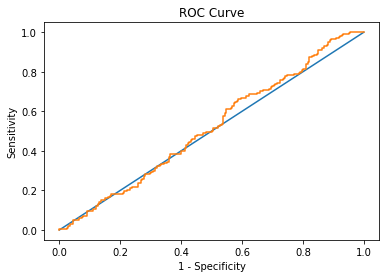

In [43]:
###################### ROC Curve #######################

# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.show()

In [44]:
# Area Under the Curve
roc_auc_score(y_test, y_pred_prob)

0.516671179360229

In [45]:
########### Log Loss ##################
from sklearn.metrics import log_loss

log_loss(y_test, y_pred_prob)

0.7260058395359844

In [46]:
############# k FOLD CV #############

from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5, random_state=2021,
                        shuffle=True)

logreg = LogisticRegression()

results = cross_val_score(logreg, x, y, cv=kfold, 
                          scoring='roc_auc')
print(results)
print("ROC AUC: %.4f (%.4f)" % (results.mean(), results.std()))

C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.50138462 0.5455386  0.55075728 0.5321165  0.51961165]
ROC AUC: 0.5299 (0.0179)


In [47]:
# Using Accuracy Score
results = cross_val_score(logreg, x, y, cv=kfold)
print(results)
print("Accuracy Score: %.4f (%.4f)" % (results.mean(), results.std()))

[0.51965066 0.55021834 0.58333333 0.53070175 0.52631579]
Accuracy Score: 0.5420 (0.0230)


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate 

In [49]:
clf=LogisticRegression()
gkf=GroupKFold(n_splits=5)
param_grid = {'classifier__C': [0.01,0.05,0.1,0.5, 1,2,3,4,5,8, 10,12,15]}
pipe=Pipeline([('scaler',StandardScaler()),('classifier',clf)])
gscv=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=16)
gscv.fit(features,label_array,groups=group_array)

GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=16,
             param_grid={'classifier__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5,
                                           8, 10, 12, 15]})

In [50]:
gscv.best_score_

0.6675119125460665

# Random Forest

In [51]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)

In [52]:
model_rf = RandomForestClassifier(random_state=1211,
                                  n_estimators=500,oob_score=True)
model_rf.fit( X_train , y_train )
y_pred = model_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[139  16]
 [  6 182]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       155
           1       0.92      0.97      0.94       188

    accuracy                           0.94       343
   macro avg       0.94      0.93      0.93       343
weighted avg       0.94      0.94      0.94       343

0.9358600583090378


In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute predicted probabilities: y_pred_prob
y_pred_prob = model_rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

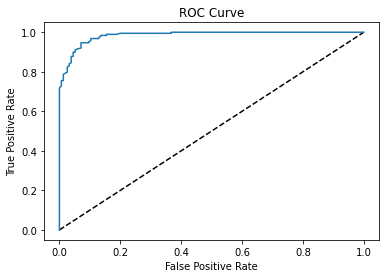

0.984471516815374

In [54]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

In [55]:

##########################Feature Importance########################
for name, importance in zip(X.columns, model_rf.feature_importances_):
    print(name, "=", importance)

1 = 3.8834237255041054e-05
2 = 3.676827745386073e-05
3 = 5.462042997898389e-05
4 = 2.587049732014156e-05
5 = 0.00022350789552216645
6 = 0.00017702395965965662
7 = 5.639039488031551e-05
8 = 5.4372874663477016e-05
9 = 6.925488114976273e-05
10 = 3.119026768623346e-05
11 = 6.198188582301168e-05
12 = 3.595113307572967e-05
13 = 9.551894998416418e-06
14 = 8.890512910768472e-06
15 = 2.401464436788239e-05
16 = 1.5193038531158455e-05
17 = 0.00010044261094423978
18 = 1.498803465696251e-05
19 = 0.003907093857766152
20 = 0.0050888427696258775
21 = 0.00924289672468166
22 = 0.006448717721013643
23 = 0.00996706970452649
24 = 0.003858210060568012
25 = 0.0038277542334359486
26 = 0.006252756819039499
27 = 0.005777413400568214
28 = 0.004752321983738853
29 = 0.0029520786999370358
30 = 0.002640494071311344
31 = 0.006975147766214928
32 = 0.00158543256265815
33 = 0.0017900593075281005
34 = 0.004938342760622834
35 = 0.005238544271760225
36 = 0.0015987740881055366
37 = 0.002425201653343603
38 = 0.00682675328977

In [56]:
import numpy as np    
features = X.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)

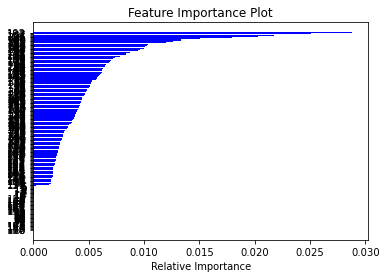

In [57]:
plt.title('Feature Importance Plot')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [58]:
#####################Out of Bag Error###############################
print(model_rf.oob_score_)

0.9386733416770964


# Grid Search CV

In [59]:
#################### Grid Search CV ################################
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {'max_features': np.arange(1,11)}

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)

model_rf = RandomForestClassifier(random_state=1211)
cv = GridSearchCV(model_rf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit( X , y )

results_df = pd.DataFrame(cv.cv_results_  )

print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

best_model = cv.best_estimator_

{'max_features': 10}
0.9849262266320519
RandomForestClassifier(max_features=10, random_state=1211)


1 = 7.825300687687134e-05
2 = 0.0
3 = 0.0
4 = 3.3839387048016195e-05
5 = 0.00026747969885109005
6 = 0.00018916614992264914
7 = 9.405685642731968e-05
8 = 0.0
9 = 1.77726593625498e-05
10 = 2.5107868194684902e-05
11 = 0.0
12 = 2.3638606688359537e-05
13 = 0.0
14 = 0.0
15 = 0.00013089222806535826
16 = 0.00010523655261731815
17 = 0.0
18 = 0.0
19 = 0.005367199449676778
20 = 0.004822255778204448
21 = 0.007900404402000035
22 = 0.004991537603911252
23 = 0.007908156407298209
24 = 0.00419291597919074
25 = 0.003517432104289842
26 = 0.006081007115107698
27 = 0.007391815299874489
28 = 0.00487775168009254
29 = 0.0025088188897509156
30 = 0.0026108760854680777
31 = 0.004963325087319393
32 = 0.002453053396602348
33 = 0.0022824647908774058
34 = 0.004602399804935183
35 = 0.004743528542185443
36 = 0.001669272450481346
37 = 0.002279318493271792
38 = 0.006668362772990814
39 = 0.007906397248009931
40 = 0.015465588283351584
41 = 0.005632935560029291
42 = 0.007092965837265451
43 = 0.006543776100422176
44 = 0.004

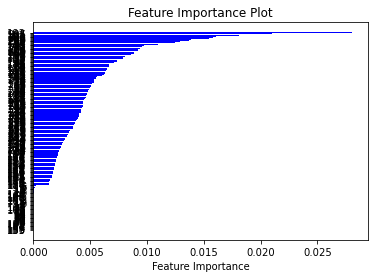

In [60]:
##########################Feature Importance########################
for name, importance in zip(X.columns, best_model.feature_importances_):
    print(name, "=", importance)

import numpy as np    
features = X.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance Plot')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.show()

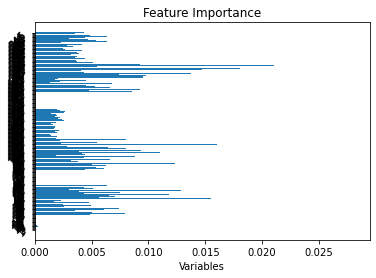

In [61]:
############ unsorted ###########
ind = np.arange(X.shape[1])
plt.barh(ind,best_model.feature_importances_)
plt.yticks(ind,(X.columns),rotation=45)
plt.title('Feature Importance')
plt.xlabel("Variables")
plt.show()

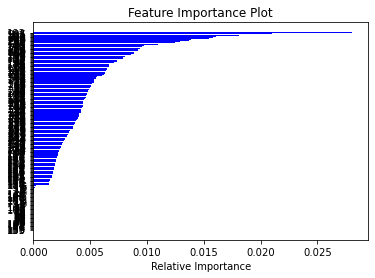

In [62]:
############ sorted #############
features = X.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance Plot')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# TPOT AUTOML

In [63]:
!pip install tpot

In [64]:
!pip install h2o

In [65]:
 import h2o

In [66]:
import tpot

C:\Users\rutuj\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [67]:
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


In [68]:
# example of tpot for the sonar classification dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
# load dataset
url = 'dataframe.csv'
dataframe = read_csv(url, header=None)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# minimally prepare dataset
X = X.astype('float32') # It takes the values of the array and produces a new array with the desire dtype
y = LabelEncoder().fit_transform(y.astype('str')) #LabelEncoder. Encode target labels with value between 0 and n_classes-1.
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) #Repeats Stratified K-Fold n times with different randomization in each repetition.
# define search

## generations: int or None optional (default=100)
## Number of iterations to the run pipeline optimization process. It must be a positive number or None. 
## If None, the parameter max_time_mins must be defined as the runtime limit.
## Generally, TPOT will work better when you give it more generations (and therefore time) to optimize the pipeline.
## TPOT will evaluate population_size + generations × offspring_size pipelines in total.

## Population is a subset of solutions in the current generation. 
## Genetic Algorithms are most commonly used in optimization problems 
## wherein we have to maximize or minimize a given objective function value under a given set of constraints.
## Number of offspring to produce in each genetic programming generation




model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(X, y)
# export the best model
model.export('best_model.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.956275108060005

Generation 2 - Current best internal CV score: 0.956275108060005

Generation 3 - Current best internal CV score: 0.956275108060005

Generation 4 - Current best internal CV score: 0.9609356725146198

Generation 5 - Current best internal CV score: 0.9609356725146198

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=2, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)


# XGBoost Randomized search cv

In [69]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [70]:
import numpy as np
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
learning_rate = [0.1, 0.2, 0.5]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# create XGBOOST 
xg = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth }

print(xg)          

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.1, 0.2, 0.5], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]}


In [4]:
xgb = XGBClassifier()
xgb=RandomizedSearchCV(estimator=xgb,param_distributions=xg,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [5]:
xgb.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [6]:
xgb.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [45]:
xgb

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [46]:
best_xgb=xgb.best_estimator_

In [74]:
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=890, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1800, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import accuracy_score
y_pred=best_xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[193  13]
 [  8 243]]
Accuracy Score 0.9540481400437637
Classification report:               precision    recall  f1-score   support

           0       0.96      0.94      0.95       206
           1       0.95      0.97      0.96       251

    accuracy                           0.95       457
   macro avg       0.95      0.95      0.95       457
weighted avg       0.95      0.95      0.95       457



# Grid search cv XGBoost

In [1]:
#################### Grid Search CV ################################
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {'max_features': np.arange(1,11)}

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)

model_rf = XGBClassifier(random_state=1211)
cv = GridSearchCV(model_rf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit( X , y )

results_df = pd.DataFrame(cv.cv_results_  )

print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

best_model = cv.best_estimator_

NameError: name 'XGBClassifier' is not defined

In [49]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


# Automated HyperParameter 

In [50]:
## hyperopt - The final aim is to find the input value to a function which can gives us the lowest possible output value
## It usually performs better than random,grid and manual search providing better performance in the testing phase 
## and reduced optimization time.
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [51]:
import pandas as pd
df=pd.read_csv('dataframe.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,label
0,-8.230427e-08,-5.056953e-08,-2.139119e-08,-2.329812e-08,-8.987772e-09,2.174590e-08,3.379884e-08,2.170994e-08,-3.781590e-09,5.106331e-09,...,0.122709,0.187020,0.253662,0.032973,0.336784,0.202450,0.192718,12.195594,0.170292,0
1,2.934170e-08,-2.061239e-08,1.506722e-08,-1.512135e-08,-4.495255e-08,1.067866e-08,3.491184e-08,1.406443e-08,1.979605e-09,-3.087960e-08,...,-0.229421,-0.165063,0.073798,0.040732,0.164113,0.143020,-0.052274,2.836013,0.141343,0
2,-1.641069e-10,5.280124e-09,-1.021157e-08,3.150728e-08,7.092091e-08,-2.520842e-08,-1.914658e-08,-9.755640e-09,1.186816e-08,3.493738e-08,...,0.065109,0.113608,0.755554,0.122601,0.575664,0.561865,0.560005,0.185203,0.960277,0
3,8.298521e-08,2.655242e-08,-2.442115e-08,-7.408002e-08,-1.063275e-07,1.694257e-07,4.011525e-08,-1.990704e-08,-6.822168e-08,-9.173997e-08,...,0.238765,2.987607,5.924446,1.157322,1.158728,4.229998,0.341205,0.185985,1.879698,0
4,-1.635594e-07,-7.573212e-10,3.885828e-08,7.585869e-08,5.762073e-08,-1.340017e-07,-3.447800e-08,1.823775e-08,5.233090e-08,5.612709e-08,...,0.103836,1.350599,4.281081,0.000138,0.304585,2.641695,-0.008615,-0.023620,0.439320,0


In [52]:
#### Independent And Dependent features
X=df.drop('label',axis=1)
y=df['label']

In [53]:
#### Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [54]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [55]:
### booster[default = gbtree]
##  booster parameter helps us to choose which booster to use.
##  It helps us to select the type of model to run at each iteration.
##  It has 3 options - gbtree, gblinear or dart.
##  gbtree and dart - use tree-based models, while
##  gblinear uses linear models.

## gamma [default=0, alias: min_split_loss]
## A node is split only when the resulting split gives a positive reduction in the loss function.
## Gamma specifies the minimum loss reduction required to make a split.
## It makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
## The larger gamma is, the more conservative the algorithm will be.
## Range: [0,∞]


### min_child_weight [default=1]
##  It defines the minimum sum of weights of all observations required in a child.
##  This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
##  It is used to control over-fitting


## colsample_bytree defines what percentage of features ( columns ) will be used for building each tree.
## colsample_bytree also use to reduce the overfitting or to control the overfitting.


## reg_alpha - It can be used in case of very high dimensionality so that the algorithm runs faster when implemented.
## Increasing this value will make model more conservative.

## n_estimators. This parameter denotes the maximum number of trees in an ensemble/forest.

## n_iterint, default=10
## Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.

## param_distributions - dictionary with parameter names

## n_iter, which controls the number of different combinations to try

## cv = 3 cross validations means we have to divede data in different parat like test and train 

### n_jobs - number of jobs run in parallel = -1 means usin all processors
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    
## "eval_set", XGBoost lets to pass data to the model to evaluate the performance of the model during training. 
## “eval_metric” to measure your error on these evaluation sets.
##  for controlling the patience of how many iterations we will wait for the next decrease in the loss value.

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [56]:
trials = Trials()

###tpe. suggest provides logic for a sequential search of the hyperparameter space. 
### The maximum number of evaluations. The trials object (optional)
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
  1%|▍                                              | 1/100 [00:00<00:17,  5.75trial/s, best loss: -0.4110787172011662]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
  5%|██▎                                            | 5/100 [00:00<00:06, 13.61trial/s, best loss: -0.4110787172011662]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
  9%|████▏                              

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 13%|█████▉                             

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 17%|███████▊                           

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 19%|████████▋                                     | 19/100 [00:01<00:04, 18.12trial/s, best loss: -0.7055393586005831]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 21%|█████████▋                                    | 21/100 [00:01<00:06, 11.43trial/s, best loss: -0.7055393586005831]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                                                                 
0.7084548104956269                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 23%|██████████▌                                   | 23/100 [00:01<00:06, 11.76trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 25%|███████████▌                                  | 25/100 [00:01<00:06, 12.16trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 29%|█████████████▎                     

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 31%|██████████████▎                               | 31/100 [00:02<00:05, 13.71trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 35%|████████████████                              | 35/100 [00:02<00:05, 12.75trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 37%|█████████████████                             | 37/100 [00:02<00:04, 13.03trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 39%|█████████████████▉                            | 39/100 [00:02<00:04, 13.00trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 43%|███████████████████▊                          | 43/100 [00:03<00:04, 13.18trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 45%|████████████████████▋                         | 45/100 [00:03<00:04, 13.42trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 49%|██████████████████████▌                       | 49/100 [00:03<00:03, 13.56trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 51%|███████████████████████▍                      | 51/100 [00:03<00:03, 13.85trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 55%|█████████████████████████▎         

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7026239067055393                                                                                                     
 57%|██████████████████████████▏                   | 57/100 [00:04<00:03, 13.91trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 61%|████████████████████████████                  | 61/100 [00:04<00:02, 13.62trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 63%|████████████████████████████▉                 | 63/100 [00:04<00:02, 13.63trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 67%|██████████████████████████████▊               | 67/100 [00:04<00:02, 13.28trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 69%|███████████████████████████████▋              | 69/100 [00:05<00:02, 13.04trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 73%|█████████████████████████████████▌            | 73/100 [00:05<00:02, 13.10trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 75%|██████████████████████████████████▌           | 75/100 [00:05<00:01, 12.92trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 79%|████████████████████████████████████▎         | 79/100 [00:05<00:01, 12.54trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 83%|███████████████████████████████████

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 85%|███████████████████████████████████████       | 85/100 [00:06<00:01, 12.96trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 87%|████████████████████████████████████████      | 87/100 [00:06<00:00, 13.03trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
 91%|█████████████████████████████████████████▊    | 91/100 [00:06<00:00, 13.35trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 93%|██████████████████████████████████████████▊   | 93/100 [00:07<00:00, 12.78trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
 97%|████████████████████████████████████████████▌ | 97/100 [00:07<00:00, 12.75trial/s, best loss: -0.7084548104956269]

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

SCORE:                                                                                                                 
0.7055393586005831                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
SCORE:                                                                                                                 
0.4110787172011662                                                                                                     
100%|█████████████████████████████████████████████| 100/100 [00:07<00:00, 13.37trial/s, best loss: -0.7084548104956269]


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



In [57]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5091341005356642, 'gamma': 5.645585422371958, 'max_depth': 15.0, 'min_child_weight': 3.0, 'reg_alpha': 43.0, 'reg_lambda': 0.5046316788175549}
